In [1]:
!pip install keras==2.2.4

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow==2.5.0

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
x_train=train_datagen.flow_from_directory(r'C:\Malan\IBM Stuff\Dataset\Dataset\TRAIN_SET',target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 4138 images belonging to 5 classes.


In [7]:
x_test=test_datagen.flow_from_directory(r'C:\Malan\IBM Stuff\Dataset\Dataset\TEST_SET',target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 1679 images belonging to 5 classes.


In [8]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [9]:
print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [10]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 995, 1: 1374, 2: 1019, 3: 275, 4: 475})

In [11]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64 ,3), activation='relu'))


In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))


In [15]:
model.add(Conv2D(32, (3, 3), activation='relu'))

In [16]:
model.add(Flatten())


In [17]:
model.add(Dense(units=128, activation='relu'))


In [18]:
model.add(Dense(units=5, activation='softmax'))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 26912)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3444864   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 3,455,653
Trainable params: 3,455,653
Non-trainable params: 0
______________________________________________

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=30)

C:\Users\Malan\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
828/828 [==============================] - 71s 85ms/step - loss: 0.6713 - accuracy: 0.7371 - val_loss: 0.3151 - val_accuracy: 0.8731
Epoch 2/30
828/828 [==============================] - 35s 42ms/step - loss: 0.4511 - accuracy: 0.8316 - val_loss: 0.2669 - val_accuracy: 0.8910
Epoch 3/30
828/828 [==============================] - 34s 41ms/step - loss: 0.4034 - accuracy: 0.8478 - val_loss: 0.2805 - val_accuracy: 0.9065
Epoch 4/30
828/828 [==============================] - 34s 41ms/step - loss: 0.3735 - accuracy: 0.8603 - val_loss: 0.2393 - val_accuracy: 0.9130
Epoch 5/30
828/828 [==============================] - 33s 40ms/step - loss: 0.3492 - accuracy: 0.8700 - val_loss: 0.2522 - val_accuracy: 0.9089
Epoch 6/30
828/828 [==============================] - 34s 41ms/step - loss: 0.3351 - accuracy: 0.8782 - val_loss: 0.2879 - val_accuracy: 0.9041
Epoch 7/30
828/828 [==============================] - 34s 41ms/step - loss: 0.3208 - accuracy: 0.8784 - val_loss: 0.2152 - val_accuracy:

In [22]:
cd C:\Malan\IBM Stuff

C:\Malan\IBM Stuff


In [23]:
model.save('nutrition.h5')

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [25]:
model = load_model("nutrition.h5")

In [26]:
img=image.load_img(r"C:\Malan\IBM Stuff\Dataset\Dataset\TEST_SET\APPLES\n07740461_20.jpg", target_size=(64,64))

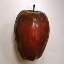

In [27]:
img

In [28]:
x=image.img_to_array(img)

In [29]:
x

array([[[222., 211., 207.],
        [222., 211., 207.],
        [222., 211., 207.],
        ...,
        [192., 184., 182.],
        [189., 180., 181.],
        [187., 178., 179.]],

       [[223., 212., 208.],
        [223., 212., 208.],
        [223., 212., 208.],
        ...,
        [193., 185., 183.],
        [190., 181., 182.],
        [188., 179., 180.]],

       [[223., 212., 208.],
        [224., 213., 209.],
        [223., 212., 208.],
        ...,
        [194., 186., 184.],
        [191., 182., 183.],
        [189., 180., 181.]],

       ...,

       [[190., 179., 173.],
        [188., 177., 171.],
        [189., 178., 172.],
        ...,
        [196., 188., 186.],
        [196., 188., 186.],
        [194., 186., 184.]],

       [[189., 178., 174.],
        [188., 178., 169.],
        [188., 177., 171.],
        ...,
        [196., 188., 186.],
        [196., 188., 186.],
        [192., 184., 182.]],

       [[186., 178., 175.],
        [185., 178., 172.],
        [188., 1

In [30]:
x=np.expand_dims(x,axis=0)

In [31]:
x

array([[[[222., 211., 207.],
         [222., 211., 207.],
         [222., 211., 207.],
         ...,
         [192., 184., 182.],
         [189., 180., 181.],
         [187., 178., 179.]],

        [[223., 212., 208.],
         [223., 212., 208.],
         [223., 212., 208.],
         ...,
         [193., 185., 183.],
         [190., 181., 182.],
         [188., 179., 180.]],

        [[223., 212., 208.],
         [224., 213., 209.],
         [223., 212., 208.],
         ...,
         [194., 186., 184.],
         [191., 182., 183.],
         [189., 180., 181.]],

        ...,

        [[190., 179., 173.],
         [188., 177., 171.],
         [189., 178., 172.],
         ...,
         [196., 188., 186.],
         [196., 188., 186.],
         [194., 186., 184.]],

        [[189., 178., 174.],
         [188., 178., 169.],
         [188., 177., 171.],
         ...,
         [196., 188., 186.],
         [196., 188., 186.],
         [192., 184., 182.]],

        [[186., 178., 175.],
       

In [32]:
y=np.argmax(model.predict(x), axis=1)

In [33]:
y

array([0], dtype=int64)

In [34]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [35]:
index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']

In [36]:
index[y[0]]

'APPLES'

In [37]:
cd C:\Malan\IBM Stuff

C:\Malan\IBM Stuff


In [38]:
!tar -zcvf nutri-analyzer-model.tgz nutrition.h5

a nutrition.h5


In [39]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [40]:
!pip install keras==2.2.4

Defaulting to user installation because normal site-packages is not writeable
